In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb

%matplotlib inline

In [2]:
#Reading the dataset
df1 = pd.read_csv("C:\\Users\eilid\\Desktop\\MSc AI Project\\example_data_for_eilidh\\aberdeen_city_simd_data.csv")
df2 = pd.read_csv("C:\\Users\eilid\\Desktop\\MSc AI Project\\example_data_for_eilidh\\saa_data_aberdeen_city(2).csv")
geocode_df = pd.read_csv("C:\\Users\eilid\\Desktop\\MSc AI Project\\example_data_for_eilidh\\geocode_df.csv")

In [3]:
#Aberdeen City SIMD 2016 dataset summary statistics. 
  
print(df1.shape)
print(df1.describe())
print(df1.info())
df1.isnull().sum()

# Before preprocessing, df shape is 6842, 59

(6842, 59)
              rank   percentile    vigintile       decile     quintile  \
count  6842.000000  6842.000000  6842.000000  6842.000000  6842.000000   
mean   4350.845075    62.889798    12.972669     6.694972     3.541070   
std    1905.068111    27.282014     5.445158     2.694730     1.338213   
min     268.000000     4.000000     1.000000     1.000000     1.000000   
25%    2607.000000    38.000000     8.000000     4.000000     2.000000   
50%    4703.000000    68.000000    14.000000     7.000000     4.000000   
75%    6060.000000    87.000000    18.000000     9.000000     5.000000   
max    6975.000000   100.000000    20.000000    10.000000     5.000000   

       income_domain_rank  employment_domain_rank  education_domain_rank  \
count         6842.000000             6842.000000            6842.000000   
mean          4501.400029             4404.485677            4008.793920   
std           1806.144677             1857.277203            2125.363262   
min            563

postcode                    0
dz                          0
dzname                      0
rank                        0
percentile                  0
vigintile                   0
decile                      0
quintile                    0
income_domain_rank          0
employment_domain_rank      0
education_domain_rank       0
health_domain_rank          0
access_domain_rank          0
crime_domain_rank           0
housing_domain_rank         0
population                  0
working_age_population      0
urclass                     0
urname                      0
izname                      0
laname                      0
hbname                      0
mmwname                     0
spcname                     0
council_area                0
total_population            0
working_age_population.1    0
income_rate                 0
income_count                0
employment_rate             0
employment_count            0
cif                         0
alcohol                     0
drug      

In [4]:
# Deleting NaN's represented by '*'
NaN = '*'
count_NaN = df1.applymap(lambda x: x == NaN).sum().sum()
print("Total counts of NaN '{}': {}".format(NaN, count_NaN))

mask = df1.applymap(lambda x: x == NaN)
counts_per_column = mask.sum()

print("Counts of NaN '{}' in each column:".format(NaN))
print(counts_per_column)

Total counts of NaN '*': 2746
Counts of NaN '*' in each column:
postcode                       0
dz                             0
dzname                         0
rank                           0
percentile                     0
vigintile                      0
decile                         0
quintile                       0
income_domain_rank             0
employment_domain_rank         0
education_domain_rank          0
health_domain_rank             0
access_domain_rank             0
crime_domain_rank              0
housing_domain_rank            0
population                     0
working_age_population         0
urclass                        0
urname                         0
izname                         0
laname                         0
hbname                         0
mmwname                        0
spcname                        0
council_area                   0
total_population               0
working_age_population.1       0
income_rate                    0
income_count

In [5]:
# Converting all cases of '*' to NaN
df1 = df1.replace('*', np.nan)

# Preprocessing

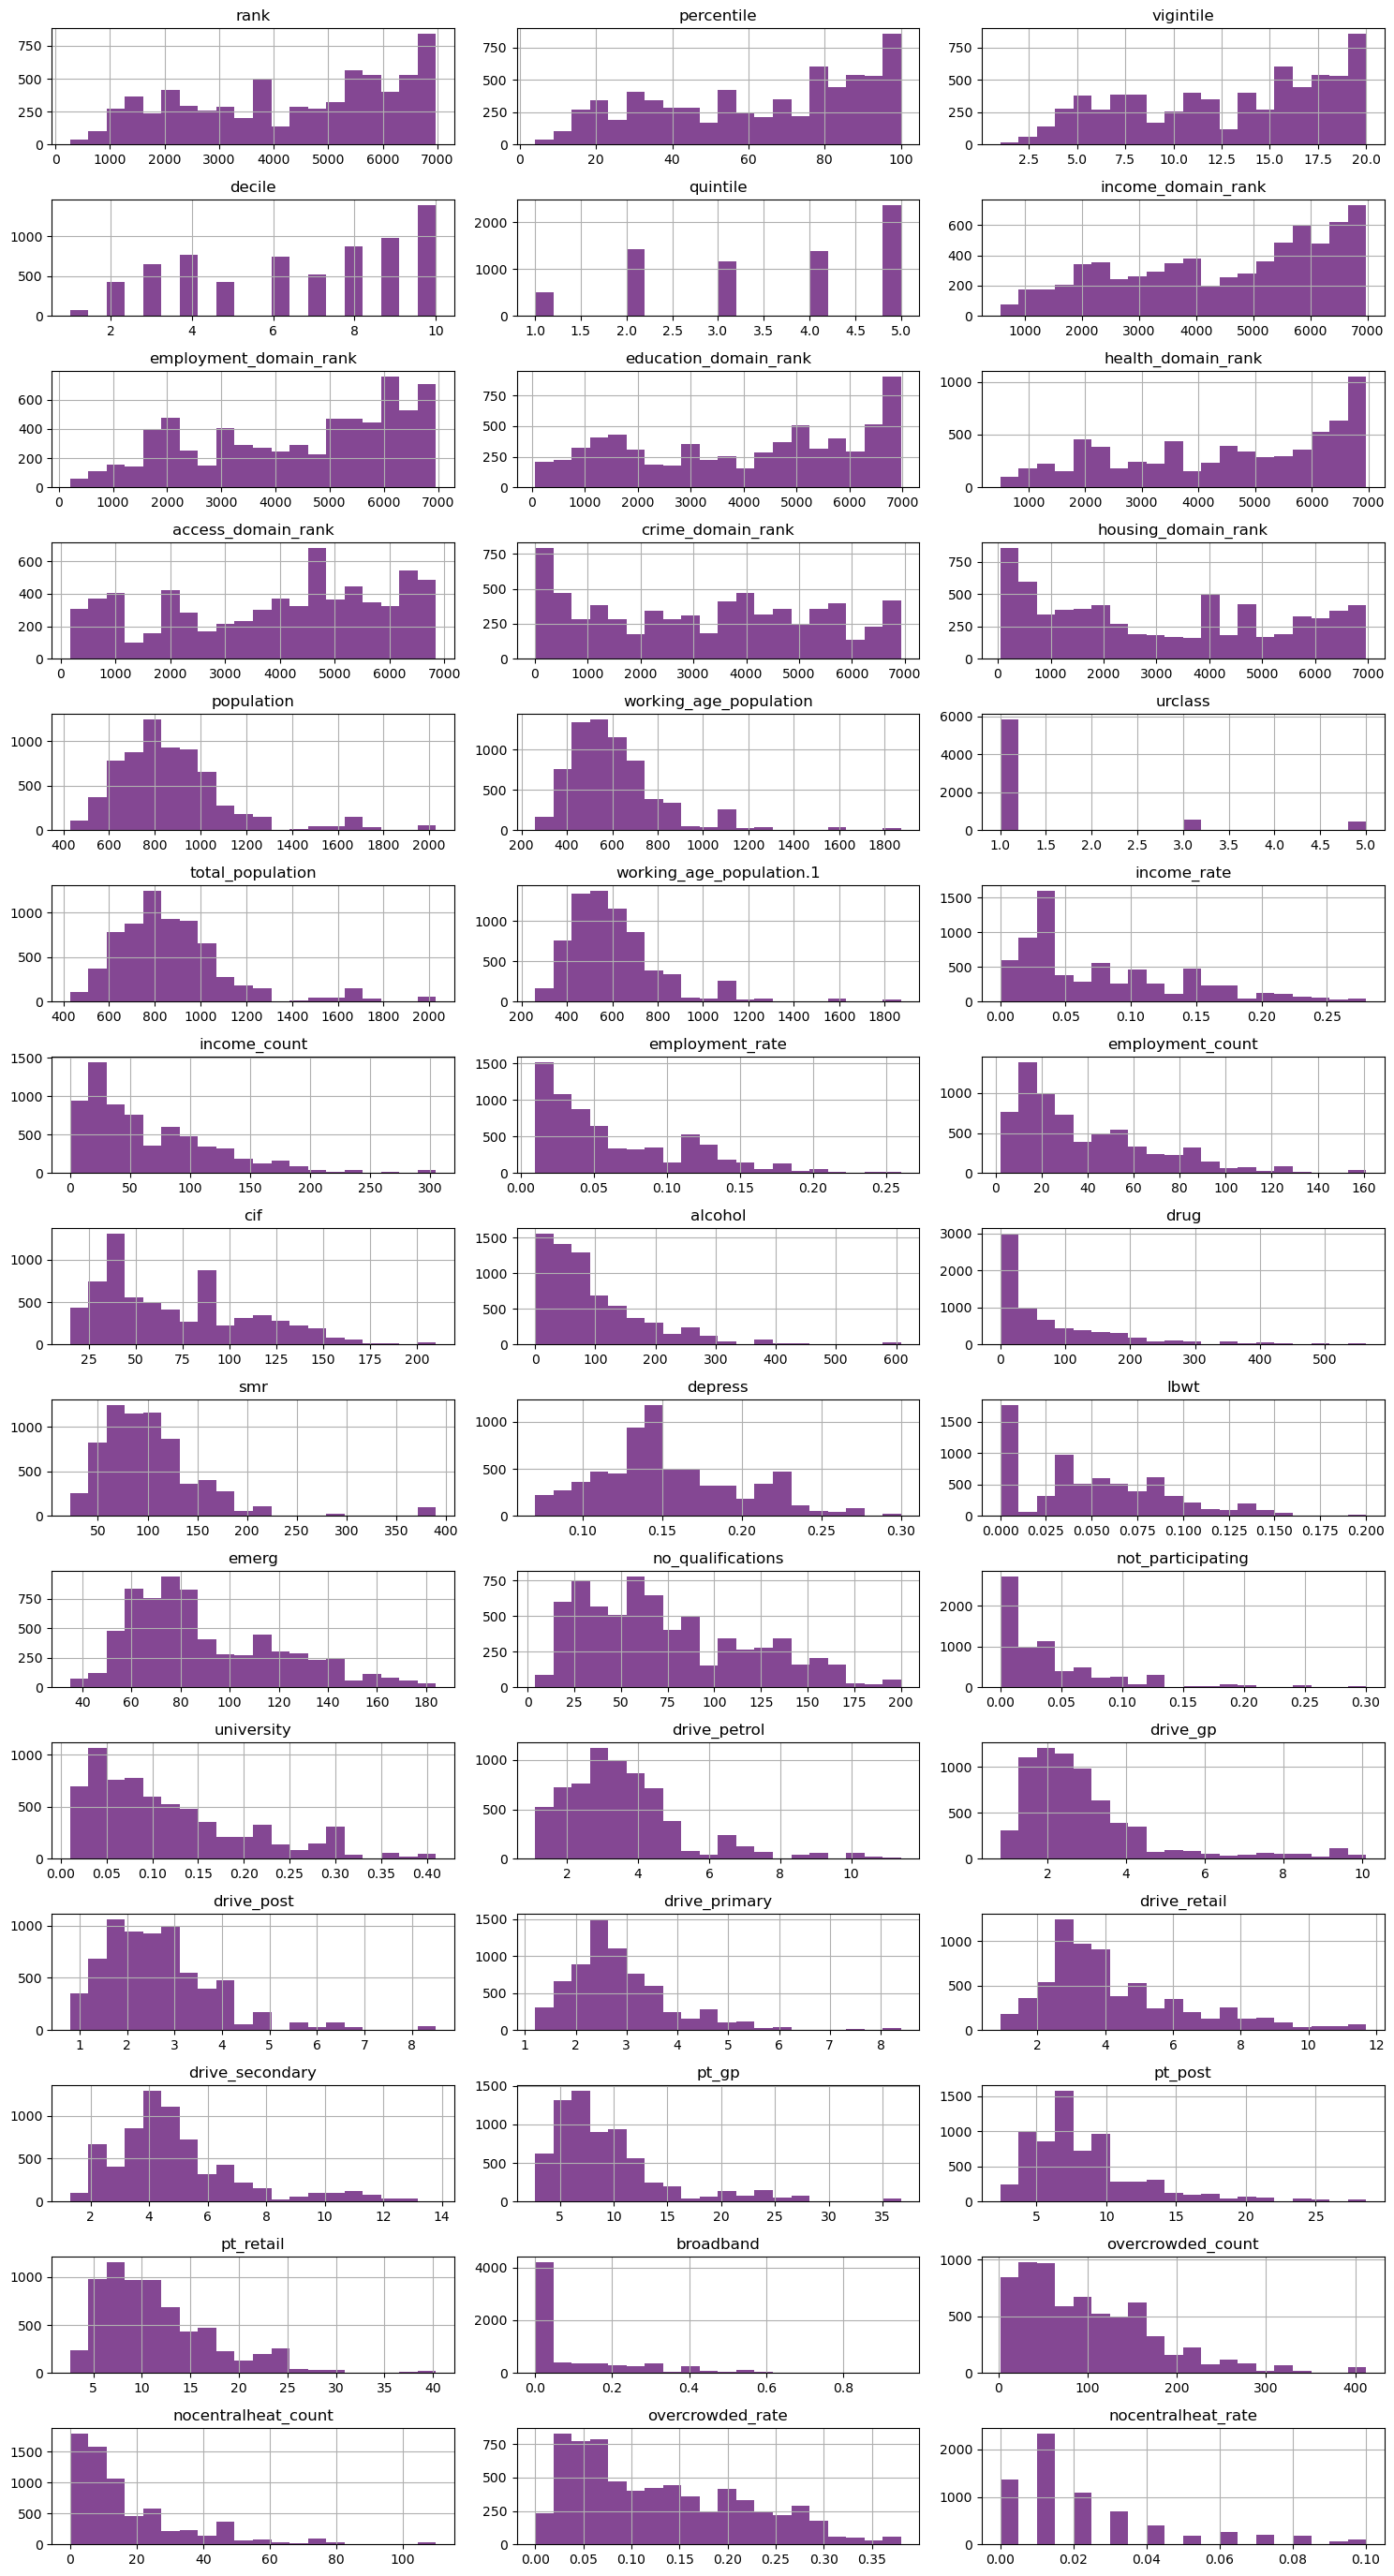

In [6]:
#Histogram to check for normality for numerical variables in DF1

sns.set_palette("PRGn")
df1.hist(bins=20, figsize=(15, 30), layout=(15, 3))  
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [7]:
#Retaining 'postcode' to be reconcated after numerical processing
df = df1['postcode']
# Dropping redundant columns 
columns_to_drop = ['postcode', 'dz', 'dzname','percentile', 'vigintile', 'decile', 'quintile', 'urclass', 'laname', 'population', 'working_age_population.1', 'izname', 'laname', 'hbname', 'mmwname', 'spcname', 'income_rate', 'employment_rate', 'crime_rate', 'overcrowded_rate', 'nocentralheat_rate']
df1 = df1.drop(columns=columns_to_drop)
df1.head()

rank  income_domain_rank  employment_domain_rank  education_domain_rank  \
0  3888                4871                    5686                   1775   
1  3888                4871                    5686                   1775   
2  3888                4871                    5686                   1775   
3  3228                3878                    4407                   2926   
4  3888                4871                    5686                   1775   

   health_domain_rank  access_domain_rank  crime_domain_rank  \
0                4431                4665                311   
1                4431                4665                311   
2                4431                4665                311   
3                3686                5174                 15   
4                4431                4665                311   

   housing_domain_rank  working_age_population             urname  ...  \
0                  195                     762  LARGE URBAN AREAS  ...   
1                  195                     762  LARGE URBAN AREAS  ...   
2                  195                     762  LARGE URBAN AREAS  ...   
3                  286                     854  LARGE URBAN AREAS  ...   
4                  195                     762  LARGE URBAN AREAS  ...   

  drive_primary  drive_retail  drive_secondary  pt_gp  pt_post  pt_retail  \
0           2.7           3.0              2.3    6.3      7.3        5.0   
1           2.7           3.0              2.3    6.3      7.3        5.0   
2           2.7           3.0              2.3    6.3      7.3        5.0   
3           2.0           2.6              2.4    4.1      5.4        5.6   
4           2.7           3.0              2.3    6.3      7.3        5.0   

   broadband  crime_count  overcrowded_count  nocentralheat_count  
0       0.42           73                152                   45  
1       0.42           73                152                   45  
2       0.42           73                152                   45  
3       0.41          374                250                   76  
4       0.42           73                152                   45  

[5 rows x 39 columns]

In [8]:
#Reclassifiying 'urname' into Urban and Rural
df1['urname'].replace(['OTHER URBAN AREAS', 'LARGE URBAN AREAS'], 'Urban', inplace=True)
df1['urname'].replace(['ACCESSIBLE SMALL TOWNS', 'ACCESSIBLE RURAL'], 'Rural', inplace=True)

In [9]:
# Label Encoding Catergorical Variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['urname'] = label_encoder.fit_transform(df1['urname'])
df1['council_area'] = label_encoder.fit_transform(df1['council_area'])

In [10]:
# Min-Max Scaling DF1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns)

In [11]:
# Replacing NaN with KNN nearest neighbours
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, missing_values=np.nan)
df1 = pd.DataFrame(imputer.fit_transform(df1),columns = df1.columns)

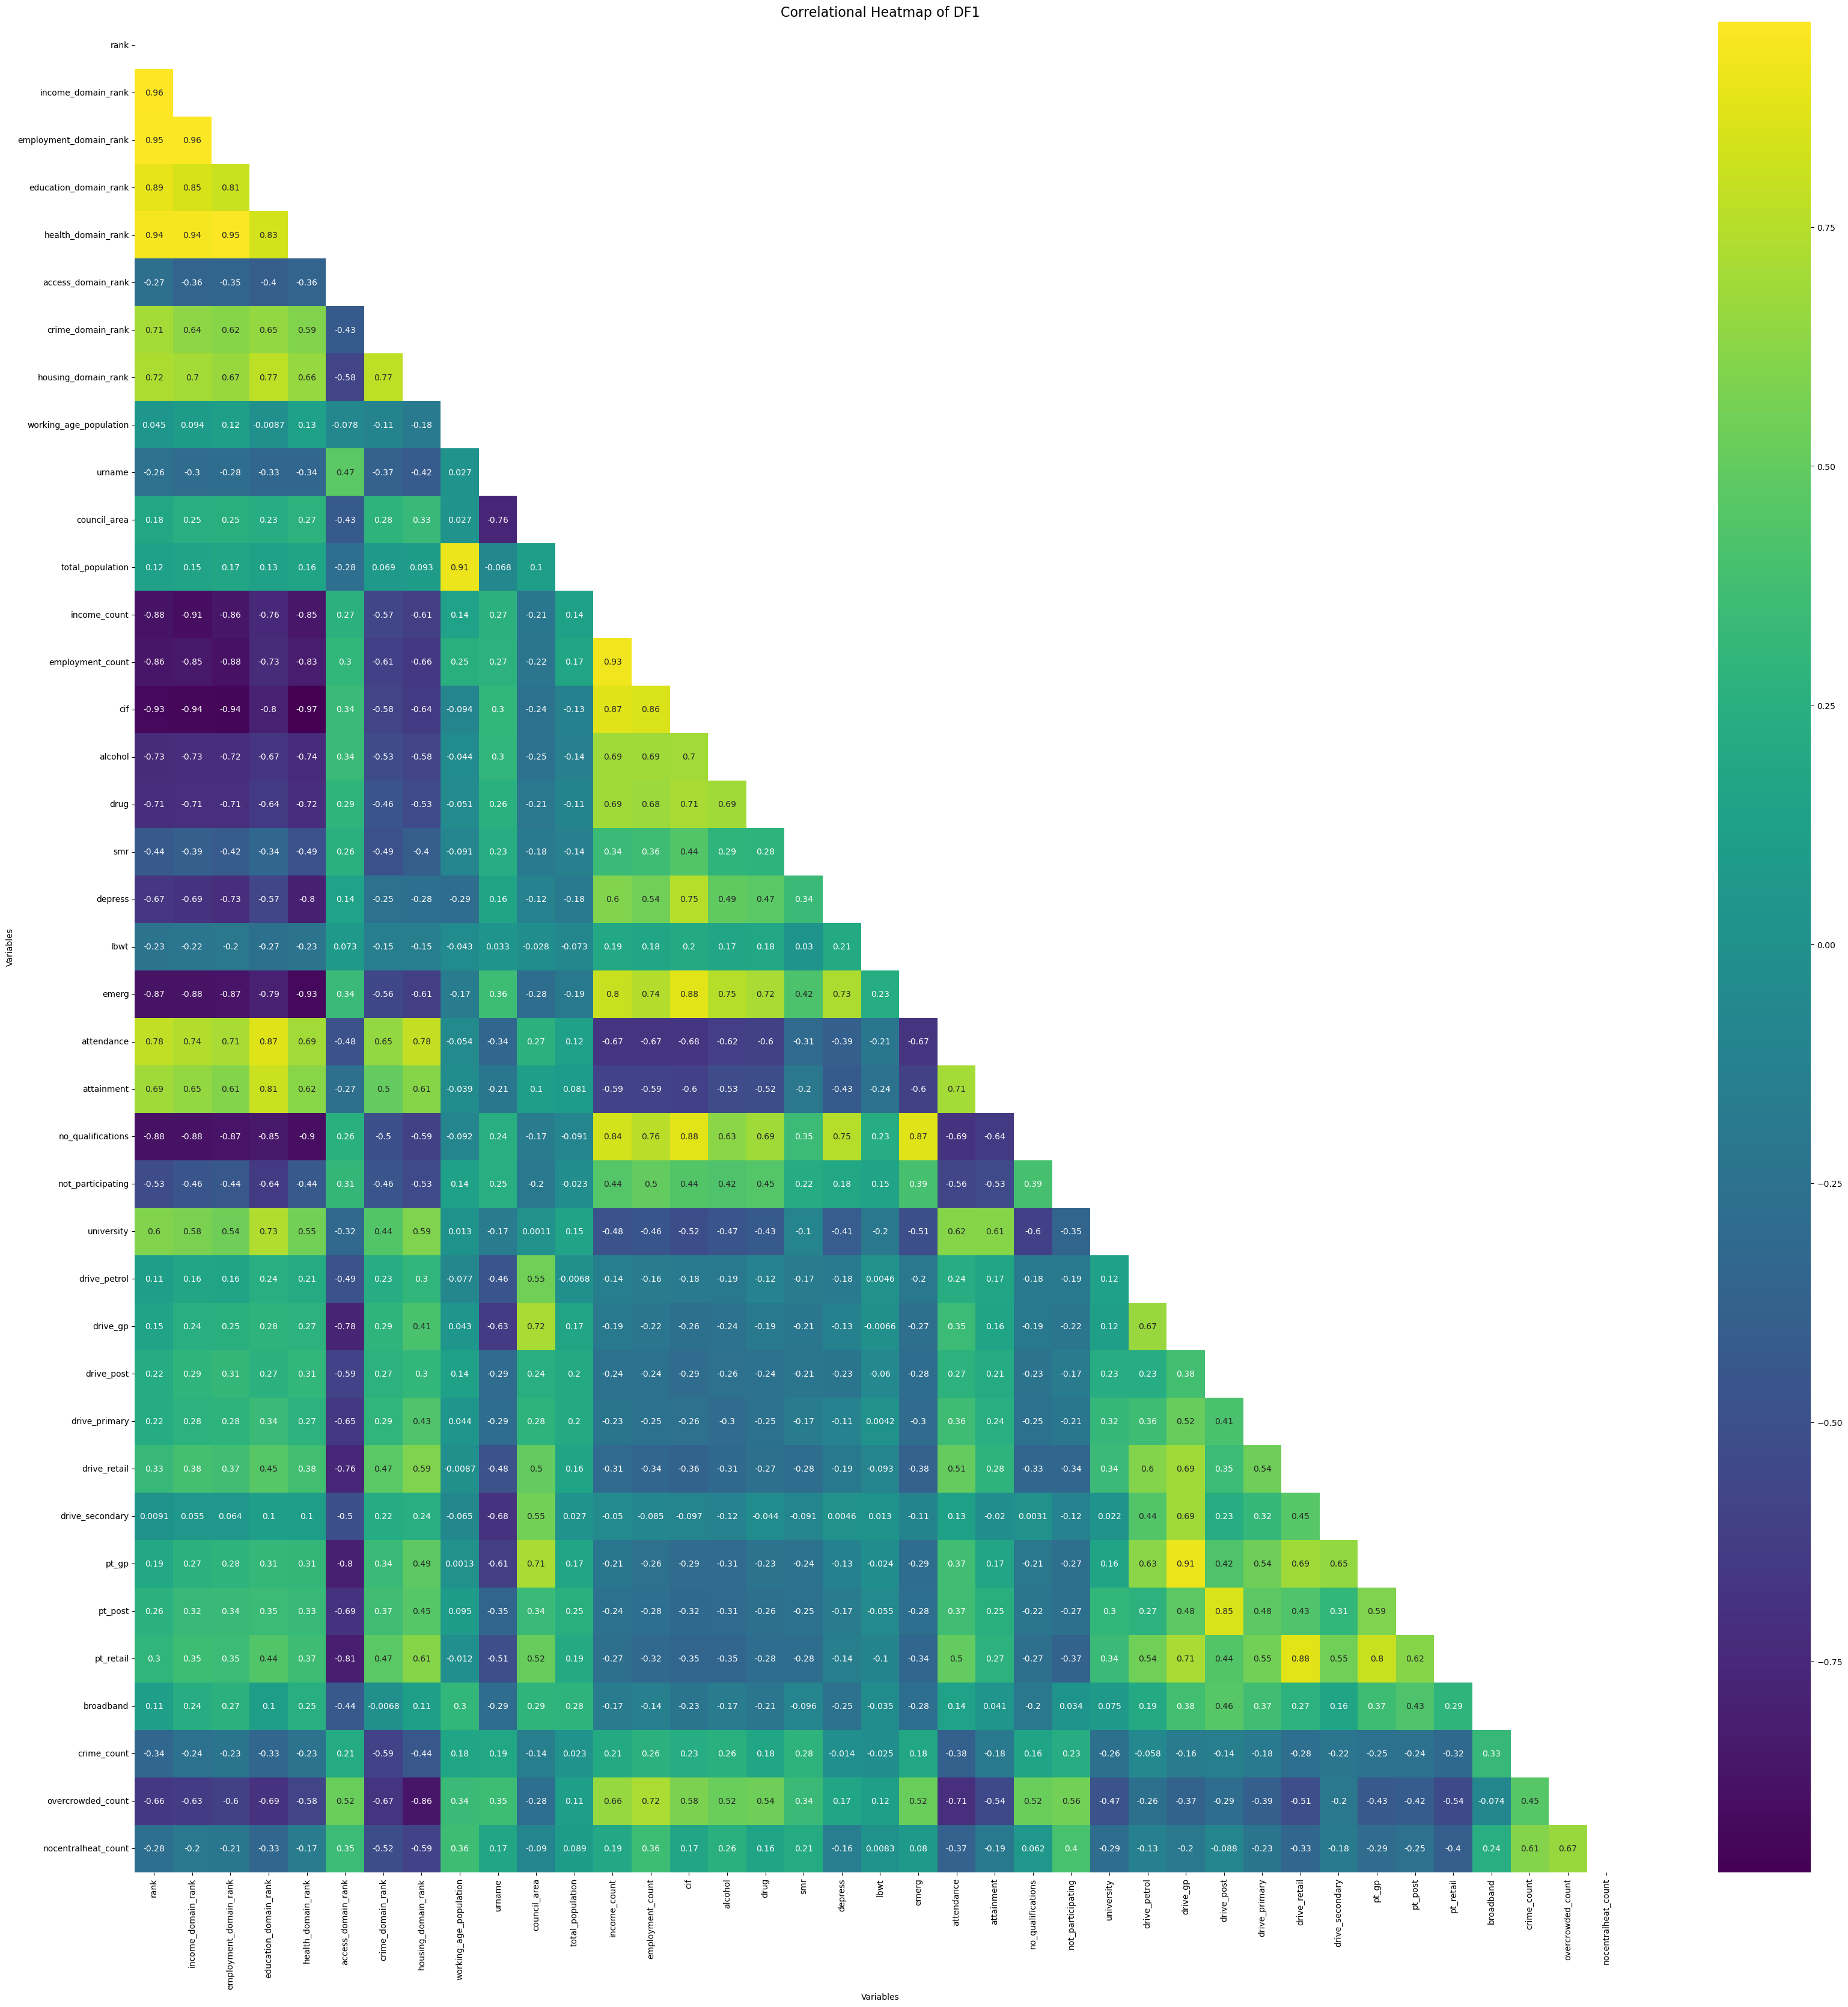

In [12]:
corr = df1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2g', cmap='viridis')
plt.title('Correlational Heatmap of DF1', size=16, c='black')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

In [13]:
#Dropping unneccessary columns from DF2 
df2 = df2[['PCOUT', 'PCIN', 'DESCRIP']]

In [14]:
# DF2 SAA data Aberdeen City Summary statistics. 
print(df2.shape)
print(df2.describe())
print(df2.info())
df2.isnull().sum()

(9940, 3)
       PCOUT  PCIN DESCRIP
count   9809  9809    9940
unique    12  1598     242
top     AB11   8JW  OFFICE
freq    2381    98    2605
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9940 entries, 0 to 9939
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PCOUT    9809 non-null   object
 1   PCIN     9809 non-null   object
 2   DESCRIP  9940 non-null   object
dtypes: object(3)
memory usage: 233.1+ KB
None


PCOUT      131
PCIN       131
DESCRIP      0
dtype: int64

In [15]:
# Drop the businesses with no associated postcode
df2 = df2.dropna(subset=['PCOUT', 'PCIN'], how='any')

In [16]:
df2['DESCRIP'].describe()

count       9809
unique       232
top       OFFICE
freq        2605
Name: DESCRIP, dtype: object

In [17]:
#Reclassiying all classes in 'DESCRIP'
business_categories_mapping = {
    'Accommodation': ['HOME', 'HUTS','SELF CATERING UNITS','HALLS','ROOMS','GUEST ACCOMMODATION', 'STAFF ACCOMMODATION', 'HOSTEL', 'HOTEL', 'GUEST HOUSE', 'SELF CATERING UNIT', 'BOTHY', 'CARAVAN'],
    'Advertising': ['ADVERTISING STATION', 'ADVERTISING STATIONS', 'ADVERTISING FACILITY'],
    'Vehicle Storage & Maintenance': ['HANGAR','CARKPARK', 'CAR SPACES', 'CAR PARK', 'CAR SPACE', 'LOCK-UP GARAGES', 'LOCK-UP GARAGE', 'GARAGE', 'GARAGE ETC', 'CARAVAN SITE', 'GARAGES', 'VEHICLE TESTING STATION', 'VEHICLE REPAIR WORKSHOPS', 'MOTOR TRADES', 'CAR WASH', 'FILLING STATION'],
    'Church & Hall': ['COMMON ROOM','CHAPLAINCY','TOWN HOUSE','CHURCH & HALL', 'CHURCH HALL', 'CHURCH', 'MOSQUE', 'SYNAGOGUE', 'MISSION HALL', 'CHAPEL', 'MOSQUE', 'SYNAGOGUE', 'TEMPLE', 'RELIGIOUS CENTRE'],
    'Residential': ['HOME'],
    'Warehouse': ['DEPOT','STORE', 'STORESS', 'STORESSS' 'PREMISES', 'SUPERSTORESSS','COLD STORE','WAREHOUSE', 'WAREHOUSES', 'WAREHOUSE ETC', 'RETAIL WAREHOUSE', 'STORAGE BASE', 'SORTING OFFICE'],
    'Commercial property': ['WORKROOMS','PAVILION','FUNCTION SUITE','STUDIO', 'STORES', 'PREMISES', 'HALL', 'ROOM', 'WORKSHOPS', 'WORKSHOPS ETC','STORES ETC', 'STORE ETC', 'SHED'],
    'Healthcare': ['TREATMENT CENTRE','SURGERY', 'CLINIC', 'HEALTH CENTRE', 'VETERINARY SURGERY', 'HOSPITAL', 'HOSPICE', 'OCCUPATIONAL CENTRE', 'REHABILITATION CENTRE', 'SUPPORT CENTRE', 'RESEARCH CENTRE', 'VISITOR CENTRE', 'MEDICAL CENTRE', 'HEALTHCARE CENTRE', 'WELLNESS CENTRE'],
    'School': ['SCHOOL', 'PRE-SCHOOL NURSERY', 'COLLEGE', 'TRAINING CENTRE', 'LIBRARY', 'UNIVERSITY BUILDINGS', 'STUDIOS', 'TRAINING FACILITY', 'LEARNING CENTRE', 'TRAINING FACILITY', 'LEARNING INSTITUTION'],
    'Pub': ['PUBLIC HOUSE', 'PUBLIC HOUSE ETC'],
    'Yard': ['YARD', 'YARD ETC'],
    'Restaurant': ['CANTEEN','RESTAURANT ETC','RESTAURANT', 'CAFE', 'LICENSED RESTAURANT', 'BAKERY', 'FISH HOUSE', 'CLUB', 'CATERING', 'KITCHEN', 'CAFETERIA'],
    'Bank': ['BANK', 'BUILDING SOCIETY'],
    'Factory & Industrial': ['NET FISHINGS','SITE', 'SITE & TANKS','QUARRY','SITE OFFICE','SITE HUTS','FACTORY', 'WORKSHOP', 'WORKSHOP ETC', 'SAWMILL', 'PAPER MILL', 'COLD STORESS', 'OIL STORAGE DEPOT', 'WASTE WATER TREATMENT WORKS', 'WASTE RECYCLING CENTRE', 'OIL COMPANY BASE', 'BIOGAS-TO-GRID PLANT', 'COMPOUND', 'BATCHING PLANT', 'INDUSTRIAL ESTATE', 'INDUSTRIAL FACILITY', 'FACTORY OUTLET', 'MANUFACTURING FACILITY', 'INDUSTRIAL PARK', 'SALMON FISHINGS', 'OIL SERVICE DEPOT',],
    'Construction': ['PREMISES UNDER RECONSTRUCTION', 'BUILDINGS', 'LAND & BUILDINGS','BUILDING'],
    'Office': ['LABORATORY','OFFICE', 'OFFICE ETC', 'OFFICES ETC', 'OFFICES', 'HEADQUARTERS', 'OFFICE SUITE', 'COMPUTER CENTRE', 'BUSINESS CENTRE', 'CONTROL TOWER', 'TELECOMMUNICATIONS FACILITIES', 'SALES OFFICE'],
    'Sports & Recreation': ['CRICKET GROUND','FITNESS CENTRE', 'GYM', 'RACING TRACK','CURLING RINK', 'SHOOTING RANGE','CHANGING ROOMS','SPORTS CENTRE', 'SPORTS GROUND', 'SWIMMING POOL', 'FOOTBALL GROUND', 'TENNIS COURTS', 'PLAYING FIELD', 'INDOOR BOWLING CLUB', 'SQUASH COURT', 'GOLF COURSE', 'BOWLING GREEN', 'HYPERBARIC CENTRE', 'RECREATION CENTRE', 'WIND TURBINE', 'BOATHOUSE', 'ARCHES', 'ARCH', 'STABLES', 'SQUASH COURTS', 'SNOOKER CLUB', 'SQUASH COURTS', 'GOLF DRIVING RANGE', 'STANCE', 'STANCES','GROUND'],
    'Culture': ['MUSEUM', 'EXHIBITION CENTRE','THEATRE & GALLERY','THEATRE', 'GALLERY', 'ART GALLERY', 'EXHIBITION CENTRE', 'GALLERY FACILITY', 'ARTS CENTRE', 'ART STUDIO'],
    'Childcare': ['DAY CENTRE', 'PLAY CENTRE'],
    'Community': ['COMMUNITY CENTRE', 'COMMUNITY FACILITY', 'CIVIC AMENITY SITE', 'CADET CENTRE'],
    'Education': ['TRAINING CENTRE', 'STUDIOS', 'RESEARCH CENTRE', 'SCHOOL', 'PRE-SCHOOL NURSERY', 'COLLEGE', 'TRAINING CENTRE', 'LIBRARY', 'UNIVERSITY BUILDINGS'],
    'Transport': ['BUS SHELTER','BUS STATION', 'AIRPORT', 'FERRY TERMINAL', 'HELIPORT', 'HELIPAD', 'PASSENGER LOUNGE', 'PORTS', 'TERMINAL', 'TERMINAL FACILITY'],
    'Retail': ['SUPERMARKET','SUPERSTORESS', 'KIOSK','SHOP', 'SHOPS', 'SHOP ETC', 'SUPERMARKET', 'GALLERY', 'GARDEN CENTRE', 'BAKERY', 'SUPERSTORE', 'SALEROOM', 'TICKET DESK','SALON', 'HAIRDRESSING SALON', 'BETTING OFFICE', 'SHOWROOM', 'SHOWHOUSE'],
    'Entertainment': ['LICENSED CLUB','BOWLING ALLEY','LEISURE CENTRE','MASONIC HALL', 'NIGHTCLUB', 'BINGO HALL', 'AMUSEMENT CENTRE', 'SNOOKER CLUB', 'CINEMA', 'DANCE STUDIO', 'CASINO', 'GAMING CLUB'],
    'Emergency Services': ['POLICE STATION','AMBULANCE STATION', 'FIRE STATION', 'COASTGUARD STATION', 'LIFEBOAT STATION'],
    'Public Services': ['POST OFFICE', 'COURT HOUSE','COMMON ROOMS', 'LAUNDRY', 'CUSTODIAL CENTRE','LIBRARY', 'READING ROOMS', 'LIBRARY FACILITY'],
    'Burial Services': ['FUNERAL REST ROOM', 'BURIAL GROUND', 'CREMATORIUM'],
    'Animal Services': ['VETERINARY HOSPITAL','KENNELS', 'CATTERY', 'EQUESTRIAN CENTRE'],
    'Energy & Waste': ['SEPTIC TANK','ELECTRICITY PLANT','REFUSE DISPOSAL WORKS','DISTRICT HEATING FACILITY', 'REFUSE TIP','TELECOMMUNICATIONS NETWORK'],
    'Other': ['ATM SITE', 'PUBLIC CONVENIENCE', 'REED BEDS', 'RADAR STATION', 'SANDPIT', 'TA CENTRE', 'PIER', 'MONITORING POST', 'FISHING HUT', 'LIGHTHOUSE', 'NAVIGATION AIDS', 'RESERVE FORCES CENTRE'],
}
  

for category, replacements in business_categories_mapping.items():
    df2['DESCRIP'] = df2['DESCRIP'].replace(replacements, category)


In [18]:
df2['DESCRIP'].value_counts()

Office                           2842
Retail                           1820
Vehicle Storage & Maintenance     945
Warehouse                         943
Factory & Industrial              824
Accommodation                     495
Restaurant                        301
Sports & Recreation               230
Commercial property               209
School                            166
Pub                               155
Healthcare                        151
Advertising                       119
Church & Hall                     117
Yard                               92
Other                              86
Construction                       75
Community                          48
Entertainment                      33
Bank                               30
Burial Services                    21
Emergency Services                 21
Energy & Waste                     20
Public Services                    19
Culture                            15
Transport                          12
Childcare   

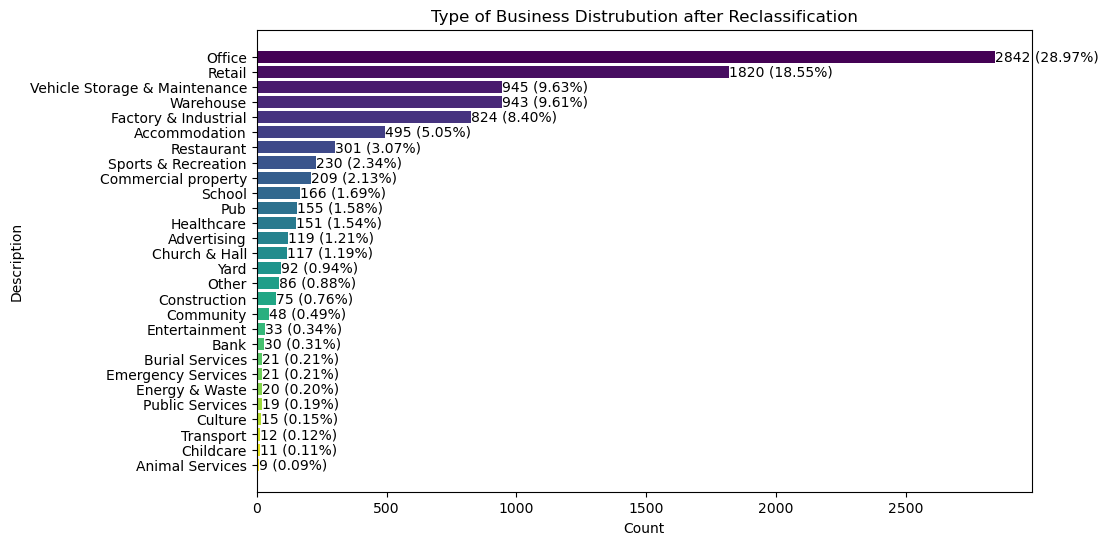

In [41]:
# Horizontal bar plot of Types of Businesses Distribution

value_counts = df2['DESCRIP'].value_counts()
total_values = len(df2['DESCRIP'])
percentages = (value_counts / total_values) * 100
plt.figure(figsize=(10, 6))  
colors = plt.cm.viridis(np.linspace(0, 1, len(value_counts)))
plt.barh(value_counts.index, value_counts, color=colors)
plt.gca().invert_yaxis() 
plt.xlabel('Count')
plt.ylabel('Description')
plt.title('Type of Business Distrubution after Reclassification')
for index, value in enumerate(value_counts):
    plt.text(value, index, f'{value:.0f} ({percentages.iloc[index]:.2f}%)', va='center')
plt.show()


In [20]:
# Concating PCOUT and PCIN 
df2['postcode'] = df2['PCOUT'] + ' ' + df2['PCIN']

# Dropping 'PCOUT' and 'PCIN'
df2.drop(columns=['PCOUT', 'PCIN'], inplace=True)
df2.head()

DESCRIP  postcode
0             Warehouse  AB23 8JW
1             Warehouse  AB23 8JW
2  Factory & Industrial  AB23 8JW
3  Factory & Industrial  AB23 8JW
4  Factory & Industrial  AB23 8JW

In [21]:
# Inserting 'postcode' column back to DF1

In [22]:
df1 = pd.concat([df, df1], axis=1)
df1.head()

postcode      rank  income_domain_rank  employment_domain_rank  \
0  AB10 1AB  0.539735            0.672495                0.811916   
1  AB10 1AF  0.539735            0.672495                0.811916   
2  AB10 1AG  0.539735            0.672495                0.811916   
3  AB10 1AH  0.441330            0.517484                0.622351   
4  AB10 1AL  0.539735            0.672495                0.811916   

   education_domain_rank  health_domain_rank  access_domain_rank  \
0               0.248337            0.608958            0.673258   
1               0.248337            0.608958            0.673258   
2               0.248337            0.608958            0.673258   
3               0.414811            0.493490            0.749513   
4               0.248337            0.608958            0.673258   

   crime_domain_rank  housing_domain_rank  working_age_population  ...  \
0           0.044339             0.021692                0.311414  ...   
1           0.044339             0.021692                0.311414  ...   
2           0.044339             0.021692                0.311414  ...   
3           0.001589             0.034852                0.368486  ...   
4           0.044339             0.021692                0.311414  ...   

   drive_primary  drive_retail  drive_secondary     pt_gp   pt_post  \
0       0.208333      0.194444            0.080  0.105882  0.187023   
1       0.208333      0.194444            0.080  0.105882  0.187023   
2       0.208333      0.194444            0.080  0.105882  0.187023   
3       0.111111      0.157407            0.088  0.041176  0.114504   
4       0.208333      0.194444            0.080  0.105882  0.187023   

   pt_retail  broadband  crime_count  overcrowded_count  nocentralheat_count  
0   0.063660   0.442105     0.181818           0.365854             0.409091  
1   0.063660   0.442105     0.181818           0.365854             0.409091  
2   0.063660   0.442105     0.181818           0.365854             0.409091  
3   0.079576   0.431579     0.963636           0.604878             0.690909  
4   0.063660   0.442105     0.181818           0.365854             0.409091  

[5 rows x 40 columns]

In [23]:
final_df = pd.merge(df1, df2, on='postcode', how='inner')
final_df.head()

postcode      rank  income_domain_rank  employment_domain_rank  \
0  AB10 1AL  0.539735            0.672495                0.811916   
1  AB10 1AN  0.539735            0.672495                0.811916   
2  AB10 1AN  0.539735            0.672495                0.811916   
3  AB10 1AN  0.539735            0.672495                0.811916   
4  AB10 1AN  0.539735            0.672495                0.811916   

   education_domain_rank  health_domain_rank  access_domain_rank  \
0               0.248337            0.608958            0.673258   
1               0.248337            0.608958            0.673258   
2               0.248337            0.608958            0.673258   
3               0.248337            0.608958            0.673258   
4               0.248337            0.608958            0.673258   

   crime_domain_rank  housing_domain_rank  working_age_population  ...  \
0           0.044339             0.021692                0.311414  ...   
1           0.044339             0.021692                0.311414  ...   
2           0.044339             0.021692                0.311414  ...   
3           0.044339             0.021692                0.311414  ...   
4           0.044339             0.021692                0.311414  ...   

   drive_retail  drive_secondary     pt_gp   pt_post  pt_retail  broadband  \
0      0.194444             0.08  0.105882  0.187023    0.06366   0.442105   
1      0.194444             0.08  0.105882  0.187023    0.06366   0.442105   
2      0.194444             0.08  0.105882  0.187023    0.06366   0.442105   
3      0.194444             0.08  0.105882  0.187023    0.06366   0.442105   
4      0.194444             0.08  0.105882  0.187023    0.06366   0.442105   

   crime_count  overcrowded_count  nocentralheat_count  \
0     0.181818           0.365854             0.409091   
1     0.181818           0.365854             0.409091   
2     0.181818           0.365854             0.409091   
3     0.181818           0.365854             0.409091   
4     0.181818           0.365854             0.409091   

                         DESCRIP  
0            Commercial property  
1  Vehicle Storage & Maintenance  
2                  Church & Hall  
3                Public Services  
4                         Office  

[5 rows x 41 columns]

In [24]:
# Removing whitespaces from 'postcode' column

final_df['postcode'] = final_df['postcode'].str.replace(' ', '')
final_df.head()

postcode      rank  income_domain_rank  employment_domain_rank  \
0  AB101AL  0.539735            0.672495                0.811916   
1  AB101AN  0.539735            0.672495                0.811916   
2  AB101AN  0.539735            0.672495                0.811916   
3  AB101AN  0.539735            0.672495                0.811916   
4  AB101AN  0.539735            0.672495                0.811916   

   education_domain_rank  health_domain_rank  access_domain_rank  \
0               0.248337            0.608958            0.673258   
1               0.248337            0.608958            0.673258   
2               0.248337            0.608958            0.673258   
3               0.248337            0.608958            0.673258   
4               0.248337            0.608958            0.673258   

   crime_domain_rank  housing_domain_rank  working_age_population  ...  \
0           0.044339             0.021692                0.311414  ...   
1           0.044339             0.021692                0.311414  ...   
2           0.044339             0.021692                0.311414  ...   
3           0.044339             0.021692                0.311414  ...   
4           0.044339             0.021692                0.311414  ...   

   drive_retail  drive_secondary     pt_gp   pt_post  pt_retail  broadband  \
0      0.194444             0.08  0.105882  0.187023    0.06366   0.442105   
1      0.194444             0.08  0.105882  0.187023    0.06366   0.442105   
2      0.194444             0.08  0.105882  0.187023    0.06366   0.442105   
3      0.194444             0.08  0.105882  0.187023    0.06366   0.442105   
4      0.194444             0.08  0.105882  0.187023    0.06366   0.442105   

   crime_count  overcrowded_count  nocentralheat_count  \
0     0.181818           0.365854             0.409091   
1     0.181818           0.365854             0.409091   
2     0.181818           0.365854             0.409091   
3     0.181818           0.365854             0.409091   
4     0.181818           0.365854             0.409091   

                         DESCRIP  
0            Commercial property  
1  Vehicle Storage & Maintenance  
2                  Church & Hall  
3                Public Services  
4                         Office  

[5 rows x 41 columns]

In [25]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9606 entries, 0 to 9605
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   postcode                9606 non-null   object 
 1   rank                    9606 non-null   float64
 2   income_domain_rank      9606 non-null   float64
 3   employment_domain_rank  9606 non-null   float64
 4   education_domain_rank   9606 non-null   float64
 5   health_domain_rank      9606 non-null   float64
 6   access_domain_rank      9606 non-null   float64
 7   crime_domain_rank       9606 non-null   float64
 8   housing_domain_rank     9606 non-null   float64
 9   working_age_population  9606 non-null   float64
 10  urname                  9606 non-null   float64
 11  council_area            9606 non-null   float64
 12  total_population        9606 non-null   float64
 13  income_count            9606 non-null   float64
 14  employment_count        9606 non-null   

In [26]:
final_df['DESCRIP'].value_counts()

Office                           2813
Retail                           1803
Warehouse                         926
Vehicle Storage & Maintenance     892
Factory & Industrial              802
Accommodation                     492
Restaurant                        295
Sports & Recreation               221
Commercial property               190
School                            160
Pub                               153
Healthcare                        150
Church & Hall                     116
Advertising                       115
Yard                               90
Other                              84
Construction                       70
Community                          47
Entertainment                      32
Bank                               29
Burial Services                    21
Emergency Services                 20
Public Services                    19
Energy & Waste                     19
Culture                            15
Transport                          12
Childcare   

In [27]:
##### Geocoding done in other notebook ####

In [28]:
final_df.to_csv('final_df.csv', index=False)

In [29]:
df = pd.read_csv("C:\\Users\eilid\\Desktop\\MSc AI Project\\example_data_for_eilidh\\final_df.csv")

# Urban Rural

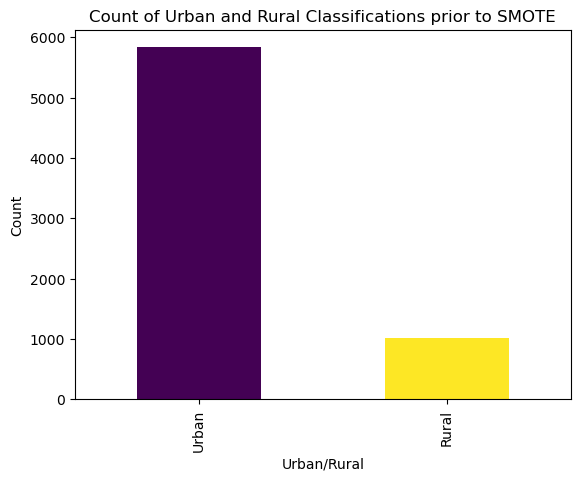

In [30]:
# Plotting Urban Rural Values
urban_rural = {
    'urname': ['Urban', 'Rural'],
    'count': [5831, 1011]
}

urban_rural = pd.DataFrame(urban_rural)
num_bars = len(urban_rural)
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))
ax = urban_rural.plot(x='urname', y='count', kind='bar', color=colors, legend=False)
ax.set_xlabel('Urban/Rural')
ax.set_ylabel('Count')
ax.set_title('Count of Urban and Rural Classifications prior to SMOTE')
plt.show()


In [31]:
# Appling Smote to Urban / Rural Classificiation
smote = SMOTE(random_state = 42)
X, y = smote.fit_resample(df1[['rank', 'access_domain_rank']], df1['urname'])
df1_smote = pd.DataFrame(X, columns = ['rank', 'access_domain_rank'])
df1_smote['urname'] = y

In [32]:
df1_smote['urname'].value_counts()

1.0    5831
0.0    5831
Name: urname, dtype: int64

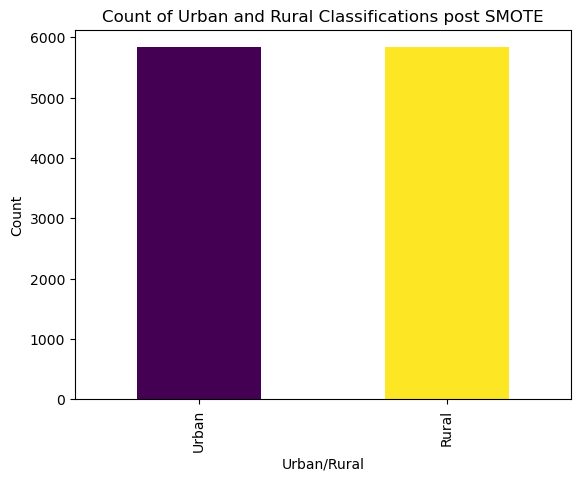

In [33]:
# Plotting SMOTE Urban Rural counts
urban_rural_smote = {
    'urname': ['Urban', 'Rural'],
    'count': [5831, 5831]
}

urban_rural_smote = pd.DataFrame(urban_rural_smote)
num_bars = len(urban_rural_smote)
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))
ax = urban_rural_smote.plot(x='urname', y='count', kind='bar', color=colors, legend=False)

ax.set_xlabel('Urban/Rural')
ax.set_ylabel('Count')
ax.set_title('Count of Urban and Rural Classifications post SMOTE')

# Show the plot
plt.show()


Text(0.5, 1.0, 'Access domain prior to SMOTE')

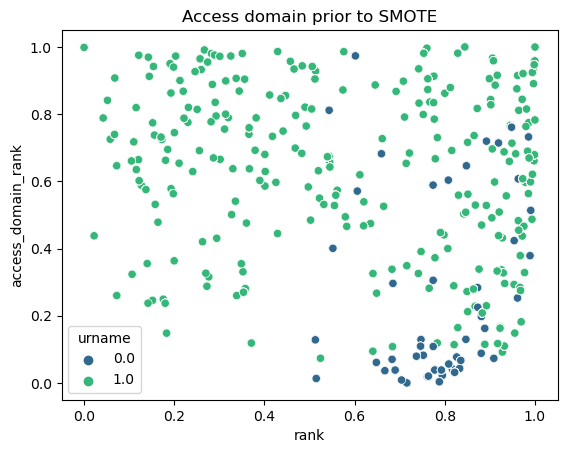

In [34]:
sns.scatterplot(data =df1, x ='rank', y = 'access_domain_rank', hue = 'urname', palette='viridis')
plt.title('Access domain prior to SMOTE')

Text(0.5, 1.0, 'Access Domain After SMOTE')

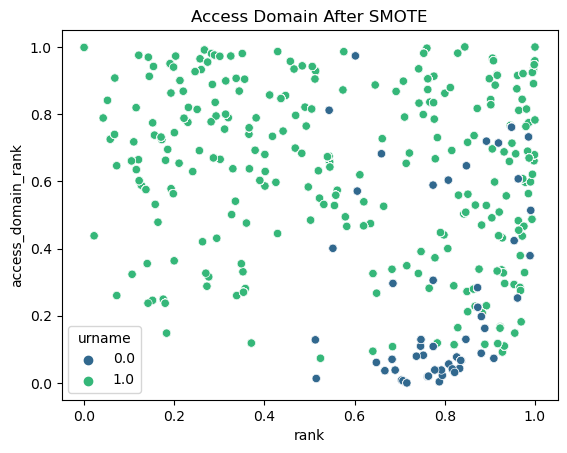

In [35]:
sns.scatterplot(data =df1_smote, x ='rank', y = 'access_domain_rank', hue = 'urname', palette='viridis')
plt.title('Access Domain After SMOTE')

# Machine learning preprocessing  

In [36]:
# Label encoding Descrip column
df['DESCRIP'] = label_encoder.fit_transform(df['DESCRIP'])

In [37]:
y = df['DESCRIP'] 
X = df.drop(['DESCRIP', 'postcode'], axis=1) 

# Training and temporary test and validation splits  - 80% training, 20% test and validation
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Further spliting the temporary set into validation and test sets 
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

In [38]:
# Encode the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Baseline Models 

In [39]:
##### Random Forest Classifier #####
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

random_forest_predictions = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions, average='weighted')
random_forest_recall = recall_score(y_test, random_forest_predictions, average='weighted')
random_forest_f1 = f1_score(y_test, random_forest_predictions, average='weighted')

print("Random Forest Classifier Metrics:")
print(f"Accuracy: {random_forest_accuracy:.2f}")
print(f"Precision: {random_forest_precision:.2f}")
print(f"Recall: {random_forest_recall:.2f}")
print(f"F1-score: {random_forest_f1:.2f}")
print()

##### Gradient Boosting #####
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)

gradient_boosting_predictions = gradient_boosting_model.predict(X_test)
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_predictions)
gradient_boosting_precision = precision_score(y_test, gradient_boosting_predictions, average='weighted')
gradient_boosting_recall = recall_score(y_test, gradient_boosting_predictions, average='weighted')
gradient_boosting_f1 = f1_score(y_test, gradient_boosting_predictions, average='weighted')

print("Gradient Boosting Metrics:")
print(f"Accuracy: {gradient_boosting_accuracy:.2f}")
print(f"Precision: {gradient_boosting_precision:.2f}")
print(f"Recall: {gradient_boosting_recall:.2f}")
print(f"F1-score: {gradient_boosting_f1:.2f}")
print()

##### Decision Tree Classifier #####
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

decision_tree_predictions = decision_tree_model.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_precision = precision_score(y_test, decision_tree_predictions, average='weighted')
decision_tree_recall = recall_score(y_test, decision_tree_predictions, average='weighted')
decision_tree_f1 = f1_score(y_test, decision_tree_predictions, average='weighted')

print("Decision Tree Classifier Metrics:")
print(f"Accuracy: {decision_tree_accuracy:.2f}")
print(f"Precision: {decision_tree_precision:.2f}")
print(f"Recall: {decision_tree_recall:.2f}")
print(f"F1-score: {decision_tree_f1:.2f}")
print()

##### Support Vector Machine (SVM) Classifier #####
svm_model = SVC(probability=True)  # Enable probability estimation for SVM
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

print("Support Vector Machine (SVM) Classifier Metrics:")
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1-score: {svm_f1:.2f}")
print()


C:\Users\eilid\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classifier Metrics:
Accuracy: 0.41
Precision: 0.32
Recall: 0.41
F1-score: 0.35



C:\Users\eilid\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eilid\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting Metrics:
Accuracy: 0.42
Precision: 0.33
Recall: 0.42
F1-score: 0.35

Decision Tree Classifier Metrics:
Accuracy: 0.41
Precision: 0.32
Recall: 0.41
F1-score: 0.35

Support Vector Machine (SVM) Classifier Metrics:
Accuracy: 0.41
Precision: 0.29
Recall: 0.41
F1-score: 0.33



C:\Users\eilid\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Perform poorly.

In [40]:
##### Random Forest Classifier #####
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

random_forest_predictions = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions, average='weighted')
random_forest_recall = recall_score(y_test, random_forest_predictions, average='weighted')
random_forest_f1 = f1_score(y_test, random_forest_predictions, average='weighted')

print("Random Forest Classifier Metrics:")
print(f"Accuracy: {random_forest_accuracy:.2f}")
print(f"Precision: {random_forest_precision:.2f}")
print(f"Recall: {random_forest_recall:.2f}")
print(f"F1-score: {random_forest_f1:.2f}")
print()

##### Gradient Boosting #####
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)

gradient_boosting_predictions = gradient_boosting_model.predict(X_test)
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_predictions)
gradient_boosting_precision = precision_score(y_test, gradient_boosting_predictions, average='weighted')
gradient_boosting_recall = recall_score(y_test, gradient_boosting_predictions, average='weighted')
gradient_boosting_f1 = f1_score(y_test, gradient_boosting_predictions, average='weighted')

print("Gradient Boosting Metrics:")
print(f"Accuracy: {gradient_boosting_accuracy:.2f}")
print(f"Precision: {gradient_boosting_precision:.2f}")
print(f"Recall: {gradient_boosting_recall:.2f}")
print(f"F1-score: {gradient_boosting_f1:.2f}")
print()

##### Decision Tree Classifier #####
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

decision_tree_predictions = decision_tree_model.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_precision = precision_score(y_test, decision_tree_predictions, average='weighted')
decision_tree_recall = recall_score(y_test, decision_tree_predictions, average='weighted')
decision_tree_f1 = f1_score(y_test, decision_tree_predictions, average='weighted')

print("Decision Tree Classifier Metrics:")
print(f"Accuracy: {decision_tree_accuracy:.2f}")
print(f"Precision: {decision_tree_precision:.2f}")
print(f"Recall: {decision_tree_recall:.2f}")
print(f"F1-score: {decision_tree_f1:.2f}")
print()

##### Support Vector Machine Classifier #####
svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

print("Support Vector Machine Classifier Metrics:")
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1-score: {svm_f1:.2f}")
print()


C:\Users\eilid\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classifier Metrics:
Accuracy: 0.41
Precision: 0.32
Recall: 0.41
F1-score: 0.35



KeyboardInterrupt: 

# Baseline Models & ADASYN

In [ ]:
# Applying ADASYN to Distribution of Businesses 
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['DESCRIP'] = y_resampled

# Splitting the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_resampled.drop('DESCRIP', axis=1), df_resampled['DESCRIP'], test_size=0.2, random_state=42)


In [ ]:
##### Random Forest Classifier #####
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

random_forest_predictions = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions, average='weighted')
random_forest_recall = recall_score(y_test, random_forest_predictions, average='weighted')
random_forest_f1 = f1_score(y_test, random_forest_predictions, average='weighted')

print("Random Forest Classifier Metrics:")
print(f"Accuracy: {random_forest_accuracy:.2f}")
print(f"Precision: {random_forest_precision:.2f}")
print(f"Recall: {random_forest_recall:.2f}")
print(f"F1-score: {random_forest_f1:.2f}")
print()

##### XGBoost Classifier #####
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions, average='weighted')
xgb_recall = recall_score(y_test, xgb_predictions, average='weighted')
xgb_f1 = f1_score(y_test, xgb_predictions, average='weighted')

print("Gradient Boosting Metrics:")
print(f"Accuracy: {gradient_boosting_accuracy:.2f}")
print(f"Precision: {gradient_boosting_precision:.2f}")
print(f"Recall: {gradient_boosting_recall:.2f}")
print(f"F1-score: {gradient_boosting_f1:.2f}")
print()

##### Decision Tree Classifier #####
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

decision_tree_predictions = decision_tree_model.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_precision = precision_score(y_test, decision_tree_predictions, average='weighted')
decision_tree_recall = recall_score(y_test, decision_tree_predictions, average='weighted')
decision_tree_f1 = f1_score(y_test, decision_tree_predictions, average='weighted')

print("Decision Tree Classifier Metrics:")
print(f"Accuracy: {decision_tree_accuracy:.2f}")
print(f"Precision: {decision_tree_precision:.2f}")
print(f"Recall: {decision_tree_recall:.2f}")
print(f"F1-score: {decision_tree_f1:.2f}")
print()

##### Support Vector Machine Classifier #####
svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

print("Support Vector Machine Classifier Metrics:")
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1-score: {svm_f1:.2f}")
print()